# Acetone-Chloroform Mixture

Here we calculate the activity and activity coefficients in an acetone-chloroform mixture.
This is inspired by KFKA05's kompendium exercise **K16.3**.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size": 16, "figure.figsize": [4.0, 3]})

## Activity and activity coefficient

Selecting pure acetone as the reference state we get that the activity is $a = p / p^* = \gamma x$. In the limit $x\rightarrow 0$ this reference state becomes problematic in the below calculation since we divide by zero and get non-a-number, `nan`, for the activity coefficient.

In [2]:
x = np.array([0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0])  # mole fractions
p = np.array([0, 13, 38, 103, 186, 273, 351])  # partial pressures
a = p / p[-1]  # activities
gamma = a / x  # activity coefficients
print("a_aceton = ", a)
print("𝛾_aceton = ", gamma)

a_aceton =  [0.         0.03703704 0.10826211 0.29344729 0.52991453 0.77777778
 1.        ]
𝛾_aceton =  [       nan 0.37037037 0.54131054 0.73361823 0.88319088 0.97222222
 1.        ]


/var/folders/q8/__l974fj6tv9gwyvvzb0w8x80000gn/T/ipykernel_40798/258887233.py:4: RuntimeWarning: invalid value encountered in divide
  gamma = a / x # activity coefficients


### Activity coefficient at infinite acetone dilution

To remedy the above issue, we use Henry's law, $p_j = k_{H,j} x_j$ which is valid when the mole fraction, $x_j$ of the solute (now acetone) is very low. Combining with $p_j = \gamma_j x_j p_j^*$ we get that,
$$
\lim_{x_j \rightarrow 0} \gamma_j = \frac{k_{H,j}}{p_j^*}
$$
Remember that $\gamma$ reflects deviations from the standard state which is _pure acetone_.
This explains why $\gamma_{x\rightarrow 0}$ is so different from unity: the environment of a single acetone molecule has been completely replaced by chloroform molecules with which it interacts differently.

In [3]:
kH = (p[1] - p[0]) / (x[1] - x[0])  # torr
print(f"kH               = {kH} torr")
print(f"𝛾_aceton for x→0 = {kH / p[-1]:.2}")

kH               = 130.0 torr
𝛾_aceton for x→0 = 0.37


### Henry's and Rault's laws

The Henry's law constant, $k_H$ can be obtained from the plot below by estimating the slope of $p_{acetone}(x)$ near $x_{acetone}=0$.
We simply use two first points of the dataset to make a rough estimate.
Next we calculate the activity coefficient at infinite acetone dilution.
The physical interpretation of $k_H$ is that it captures the interaction free energy of inserting a single acetone molecule into pure chloroform.
At the other end of the scale, when $x_{acetone}\rightarrow 1$, Rault's law is applicable. The slope is now the _vapor pressure_, $p^*_{acetone}$, which embodies acetone-acetone interactions.
Below we see a plot of the acetone data as well as Henry's law and Rault's laws applicable at low and high acetone mole fractions, respectively.

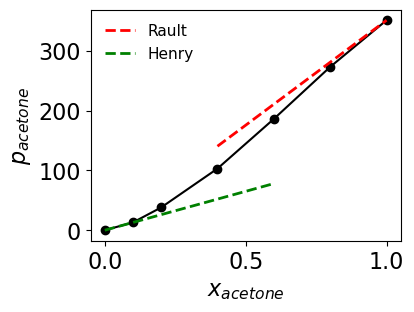

In [4]:
plt.plot(x, p, "ko-")
plt.plot(x[-4:], p[-1] * x[-4:], "r--", label="Rault", lw=2)
plt.plot(x[0:5], kH * x[0:5], "g--", label="Henry", lw=2)
plt.xlabel("$x_{acetone}$")
plt.ylabel("$p_{acetone}$")
plt.legend(frameon=False, loc=0, fontsize="x-small")
plt.show()